#CIS 545 Final Project
####Group Members: Shreya Viswanathan, Savan Patel, Vyaas Valsaraj

#Background

**Motivation**

According to the CDC, 11.3% of the US population has diabetes, which amounts to 37.3 million people total. A study by Haque et al. in 2021 found that the annual inpatient cost of diabetes mellitus in the U.S. was $97 billion. 

In this project, we will be using a dataset of inpatient diabetic encounters from 130 US hospitals between 1999 and 2008. The data contains attributes for demographic information (i.e. age, gender, race, etc.), patient history (i.e., prior visits), and treatment details (i.e., medications, lab tests, etc.). We will use these attributes to build a predictive model for hospital readmission after the initial inpatient encounter. Early prediction of patients who are at-risk for rehospitalization may help guide preventive treatment and greatly decrease the cost burden on the patient and healthcare system.

**Additional information about dataset**

Each encounter in this dataset met the following criteria: 

1. The encounter resulted in a hospital admission
2. Diabetes(of any kind) was entered into the system as a diagnosis
3. Length of stay was between 1-14 days
4. Lab tests were performed
5. Medications were administered. 

Readmission column was coded as: 

0: no readmission

1: Readmitted in >30 days

2: Readmitted in <30 days


##Importing Modules

First, we import the necessary modules.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Ingestion and Cleaning

In [3]:
# Read the dataset into a pandas dataframe
diabetes_df=pd.read_csv("/content/drive/MyDrive/diabetes.csv")

In [4]:
# View the first 5 rows of the dataset to understand the data structure
diabetes_df.head(5)

,id,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,1,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,...,No,No,No,No,No,No,No,No,No,NO
1,2,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,3,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,...,No,No,No,No,No,No,No,No,Yes,NO
3,4,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
#Get the size of the dataset
diabetes_df.shape

(101766, 51)

####Null Values

Some columns in the data have missing data denoted by "?". To standardize the format of missing values, we will replace them with null values.

In [6]:
#Replace "?" with NaN
diabetes_df=diabetes_df.replace("?",np.NaN)

In [7]:
#View first 5 rows to ensure missing values were replaced with NaN
diabetes_df.head(5)

,id,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,1,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,...,No,No,No,No,No,No,No,No,No,NO
1,2,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,3,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,...,No,No,No,No,No,No,No,No,Yes,NO
3,4,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


It is difficult to build models if certain features have many missing values. We want to see how many nun-null values we have for each column.

In [8]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   id                        101766 non-null  int64 
 1   encounter_id              101766 non-null  int64 
 2   patient_nbr               101766 non-null  int64 
 3   race                      99493 non-null   object
 4   gender                    101766 non-null  object
 5   age                       101766 non-null  object
 6   weight                    3197 non-null    object
 7   admission_type_id         101766 non-null  int64 
 8   discharge_disposition_id  101766 non-null  int64 
 9   admission_source_id       101766 non-null  int64 
 10  time_in_hospital          101766 non-null  int64 
 11  payer_code                61510 non-null   object
 12  medical_specialty         51817 non-null   object
 13  num_lab_procedures        101766 non-null  int64 
 14  num_

We can drop the 'weight', 'payer_code' and 'medical_specialty' columns all together because there are not many non-null values in those columns. For the remaining columns, we can just drop the rows with null values in them. This will still leave us with an decently sized dataset to work with.

In [9]:
diabetes_df=diabetes_df.drop(['weight','payer_code','medical_specialty'], axis = 1)
diabetes_df=diabetes_df.dropna()

In [10]:
diabetes_df.info()
#There shouldn't be null values in any of the columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98053 entries, 1 to 101765
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        98053 non-null  int64 
 1   encounter_id              98053 non-null  int64 
 2   patient_nbr               98053 non-null  int64 
 3   race                      98053 non-null  object
 4   gender                    98053 non-null  object
 5   age                       98053 non-null  object
 6   admission_type_id         98053 non-null  int64 
 7   discharge_disposition_id  98053 non-null  int64 
 8   admission_source_id       98053 non-null  int64 
 9   time_in_hospital          98053 non-null  int64 
 10  num_lab_procedures        98053 non-null  int64 
 11  num_procedures            98053 non-null  int64 
 12  num_medications           98053 non-null  int64 
 13  number_outpatient         98053 non-null  int64 
 14  number_emergency     

#Exploratory Data Analysis

In this section, we will visualize the distribution of the data along different attributes and look at correlations between attributes. We will use this initial analysis to inform our feature selection for our machine learning models.

In [11]:
diabetes_df.head(5)

,id,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
1,2,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,3,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,4,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,6,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30


##Discharge Disposition

The discharge_disposition_id is represented in the data as an integer value, but each id maps to particular discharge destination: 
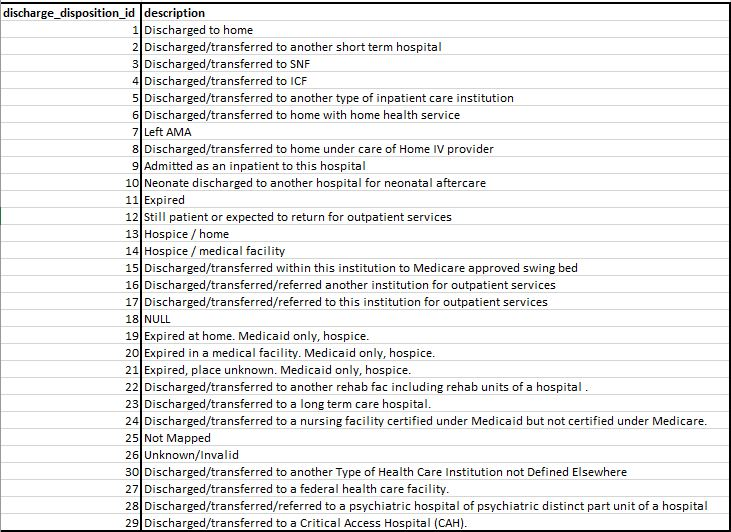

It is helpful to visualize how many patients get sent to each discharge destination because this may be a predictor of rehospitalization (due to varying levels of care at each discharge destination).


<BarContainer object of 26 artists>

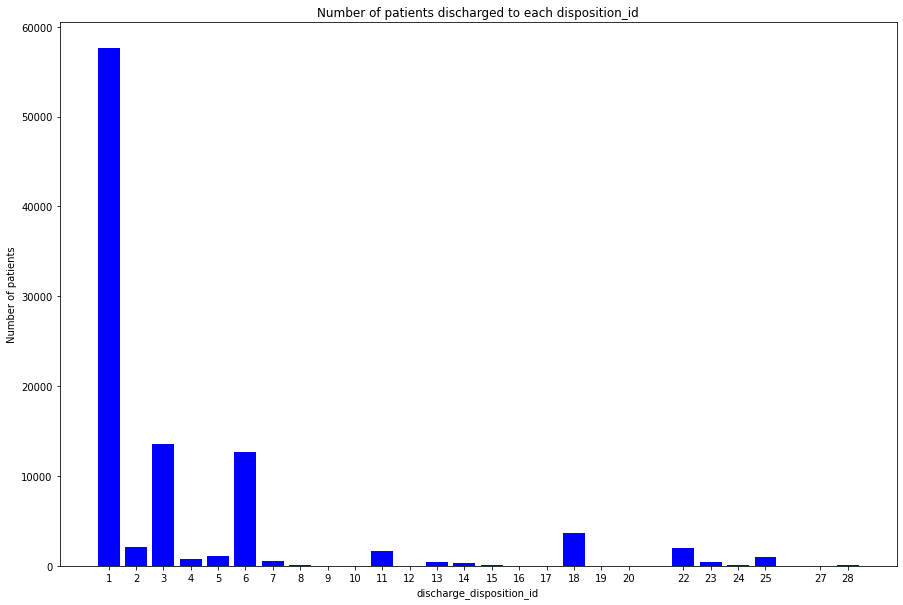

In [12]:
df_discharge=diabetes_df.groupby("discharge_disposition_id")["id"].count()
df_discharge=df_discharge.reset_index()
df_discharge=df_discharge.rename(columns={"id":"count"})
df_discharge
x=[i for i in df_discharge["discharge_disposition_id"]]
y=[j for j in df_discharge["count"]]
plt.figure(figsize=(15,10))
plt.xticks(x)
plt.xlabel('discharge_disposition_id')
plt.ylabel('Number of patients')
plt.title('Number of patients discharged to each disposition_id')
#Visualize frequency of each discharge_dispositio_id
plt.bar(x,y,color=["blue"])

From this visualization, we can see that the majority of patients were discharged to home and a significant amount were discharged to an inpatient care unit or another short term hospital.

##Age

We would also like see the distribution of data across various age groups.

In [13]:
#Count the number of patients in each age bracket
df_age=diabetes_df.groupby("age")["id"].count()
df_age=df_age.reset_index()
df_age=df_age.rename(columns={"id":"count"})

In [14]:
#Replace square brackets
df_age["age"]=df_age["age"].apply(lambda x:"("+x[1:-1]+")")
df_age

,age,count
0,(0-10),65
1,(10-20),466
2,(20-30),1478
3,(30-40),3548
4,(40-50),9265
5,(50-60),16697
6,(60-70),21809
7,(70-80),25306
8,(80-90),16702
9,(90-100),2717


We will use a bar plot to visually compare the number of patients in different age groups.

Text(0.5, 1.0, 'Age distribution across dataset')

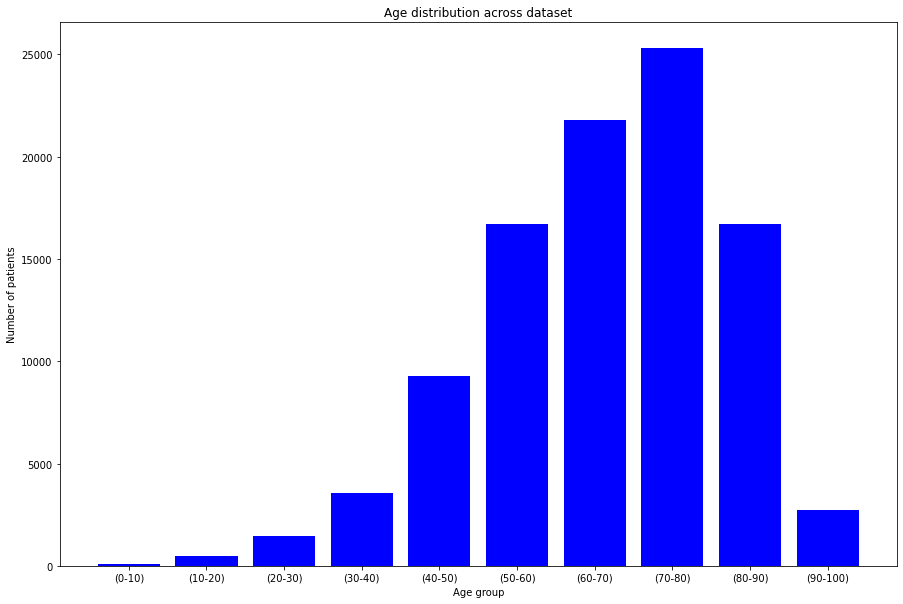

In [15]:
x=[j for j in df_age["age"]]
y=[j for j in df_age["count"]]
plt.figure(figsize=(15,10))
plt.bar(x,y,color=["blue"])
plt.xlabel('Age group')
plt.ylabel('Number of patients')
plt.title('Age distribution across dataset')

It is not surprising that the age distribution is skewed higher.  We will not further examine age in our EDA because these trends have been widely known and studied. Instead we will focus on other demographic factors and incorporate age as a feature in our final model to predict readmission.

##Gender

We are also interested in the patient gender distribution. We will isolate this column from the data frame and group by gender.

In [16]:
#Drop the rows with unknown or invalid gender
index_gender=diabetes_df[diabetes_df["gender"]=="Unknown/Invalid"].index
diabetes_df=diabetes_df.drop(index_gender)
diabetes_df[diabetes_df["gender"]=="Unknown/Invalid"]


,id,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted


In [17]:
#Count the number of patients of each gender
df_gender=diabetes_df[["gender","id"]]
df_gender=df_gender.groupby("gender")["id"].count()
df_gender=df_gender.reset_index()
df_gender=df_gender.rename(columns={"id":"count"})
df_gender

,gender,count
0,Female,52833
1,Male,45219


It appears that the gender distribution is roughly equal. We will visualize this with a bar plot.

Text(0.5, 1.0, 'Gender distribution across dataset')

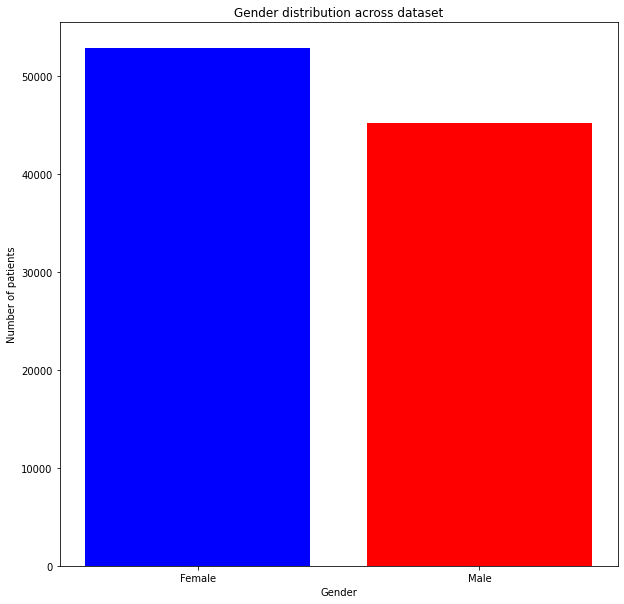

In [18]:
#Count patients in each gender group
x=[j for j in df_gender["gender"]]
y=[j for j in df_gender["count"]]
plt.figure(figsize=(10,10))
plt.bar(x,y,color=["blue","red"])
plt.xlabel('Gender')
plt.ylabel('Number of patients')
plt.title('Gender distribution across dataset')

Text(0.5, 1.0, 'Gender distribution (by percentage) across dataset')

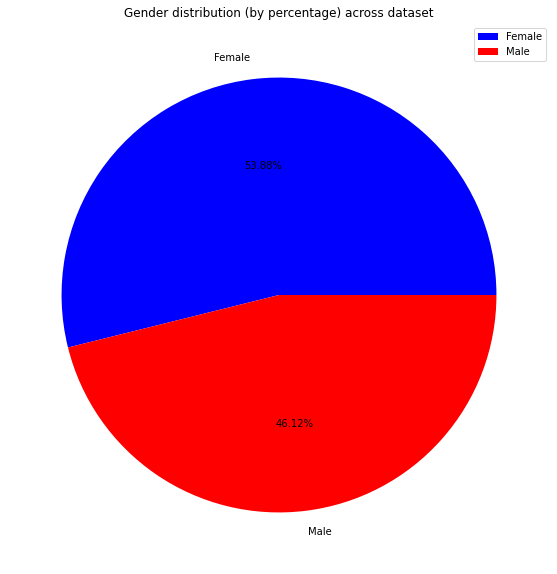

In [19]:
plt.figure(figsize=(15,10))
plt.pie(y,labels=x,autopct='%1.2f%%',colors=["blue","red"])
plt.legend()
plt.title('Gender distribution (by percentage) across dataset')


As a percentage, males and females are represented roughly equally in the data, with slightly more males. 

##Race

Many studies have shown an association between race and health outcomes. We are interested to see if race is a determinant for whether or not a patient will be rehospitalized after their initial visit. While conducting this analysis, we will be mindful that each some races may be underrepresented in the data. Thus, we will need to count readmitted patients as a proportion of each race group.

In [20]:
#Count the number of patients of each race
df_race=diabetes_df.groupby("race")["id"].count()
df_race=df_race.reset_index()
df_race=df_race.rename(columns={"id":"count"})
df_race=df_race.sort_values(by=["count"],ascending=False)
df_race

,race,count
2,Caucasian,75079
0,AfricanAmerican,18881
3,Hispanic,1984
4,Other,1483
1,Asian,625


The above analysis shows that the majority of patients in this dataset were of Caucasian descent. We must also keep in mind that Caucasians comprised 78% of the US population in the beginning of the 21st century when this data was collected(1999-2008).

We can visualize each race group as a percentage of the total patient population using a pie chart.

Text(0.5, 1.0, 'Race distribution (by percentage) across dataset')

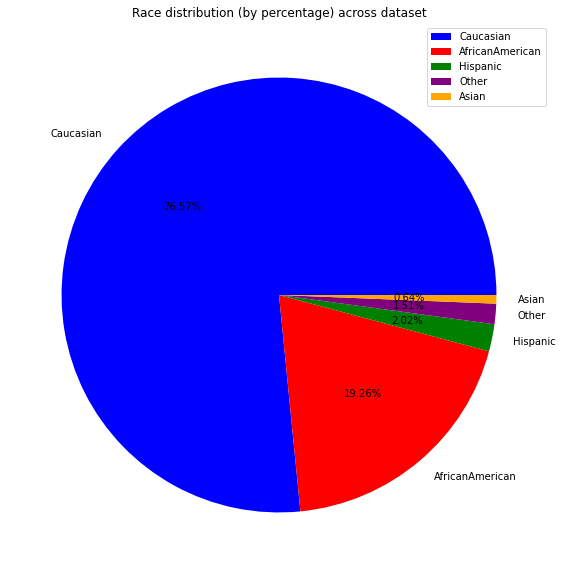

In [21]:
#Count patients in each race group
x=[j for j in df_race["race"]]
y=[j for j in df_race["count"]]
plt.figure(figsize=(10,10))
plt.pie(y,labels=x,colors=["blue","red","green","purple","orange"],autopct='%1.2f%%')
plt.legend()
plt.title('Race distribution (by percentage) across dataset')

Now that we have visualized the distribution of patients in different demographic groups, we will analyze the outcomes (readmission rates) within these groups.

##Outcomes: Readmission rate

We would like to know if there are any demographic trends within the subset of patients who were readmitted. 

###Gender

In [22]:
#Create a new dataframe including the patients who were readmitted
diabetes_readmit_df=diabetes_df[diabetes_df["readmitted"]!="NO"]
diabetes_readmit_df

,id,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
1,2,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
5,6,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
7,8,63768,114882984,Caucasian,Male,[70-80),1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
10,11,28236,89869032,AfricanAmerican,Female,[40-50),1,1,7,9,...,No,Steady,No,No,No,No,No,No,Yes,>30
11,12,36900,77391171,AfricanAmerican,Male,[60-70),2,1,4,7,...,No,Steady,No,No,No,No,No,Ch,Yes,<30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,101755,443842016,183087545,Caucasian,Female,[70-80),1,1,7,9,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
101755,101756,443842022,188574944,Other,Female,[40-50),1,1,7,14,...,No,Up,No,No,No,No,No,Ch,Yes,>30
101756,101757,443842070,140199494,Other,Female,[60-70),1,1,7,2,...,No,Steady,No,No,No,No,No,No,Yes,>30
101760,101761,443847176,50375628,AfricanAmerican,Female,[60-70),1,1,7,6,...,No,Down,No,No,No,No,No,Ch,Yes,>30


We will visuallize what the gender distribution looks like among readmitted patients.

Text(0.5, 1.0, 'Proportion of total readmitted patients belonging to each gender category')

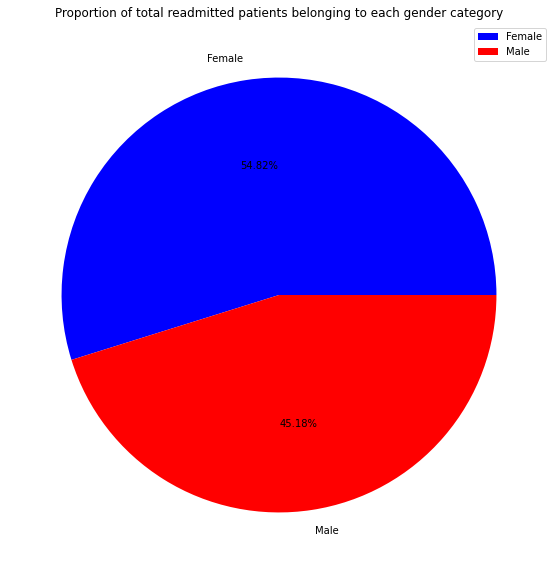

In [23]:
#Calculate proportion of total readmitted patients belonging to each gender category
df_gender_readmit=diabetes_readmit_df[["gender","id"]]
df_gender_readmit=df_gender_readmit.groupby("gender")["id"].count()
df_gender_readmit=df_gender_readmit.reset_index()
df_gender_readmit
df_gender_readmit=df_gender_readmit.rename(columns={"id":"count"})
df_gender_readmit=df_gender_readmit.sort_values(by=["count"],ascending=False)
x=[j for j in df_gender_readmit["gender"]]
y=[j for j in df_gender_readmit["count"]]
total = [j for j in df_gender["count"]]
readmit = [j for j in df_gender_readmit["count"]]
readmit_percent_total=[(readmit[i]/sum(readmit))*100 for i in range(len(total))]
x=[j for j in df_gender_readmit["gender"]]
plt.figure(figsize=(15,10))
plt.pie(readmit_percent_total,labels=x,colors=["blue","red"],autopct='%1.2f%%')
plt.legend()
plt.title("Proportion of total readmitted patients belonging to each gender category")

It appears that the slight majority of readmitted patients were female. To adjust for representation in the overall dataset, it is most useful compare the readmission rate of each gender group.

Text(0, 0.5, 'Readmission rate (%)')

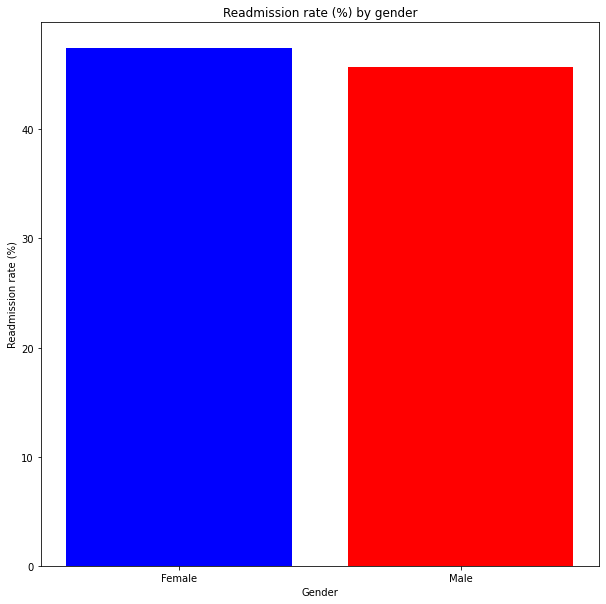

In [24]:
total = [j for j in df_gender["count"]]
readmit = [j for j in df_gender_readmit["count"]]
df_gender_readmit
readmit_percent=[(readmit[i]/total[i])*100 for i in range(len(total))]
x=[j for j in df_gender_readmit["gender"]]
plt.figure(figsize=(10,10))
plt.bar(x,readmit_percent,color=["blue","red","green","purple","orange"])
plt.title("Readmission rate (%) by gender")
plt.xlabel('Gender')
plt.ylabel('Readmission rate (%)')

It seems that female and male patients had roughly equal readmission rates (with the female group having a marginally higher admission rate). Gender does not appear to be a predictive factor so far.

###Race

Now, we will examine readmissions rates based on race.

In [25]:
#Create dataframe containing subset of patients who were readmitted and group by race
df_race_readmit=diabetes_readmit_df.groupby("race")["id"].count()
df_race_readmit=df_race_readmit.reset_index()
df_race_readmit=df_race_readmit.rename(columns={"id":"count"})
df_race_readmit=df_race_readmit.sort_values(by=["count"],ascending=False)
x=[j for j in df_race_readmit["race"]]
y=[j for j in df_race_readmit["count"]]

df_race_readmit

,race,count
2,Caucasian,35386
0,AfricanAmerican,8683
3,Hispanic,840
4,Other,582
1,Asian,224


Text(0, 0.5, 'Readmission rate (%)')

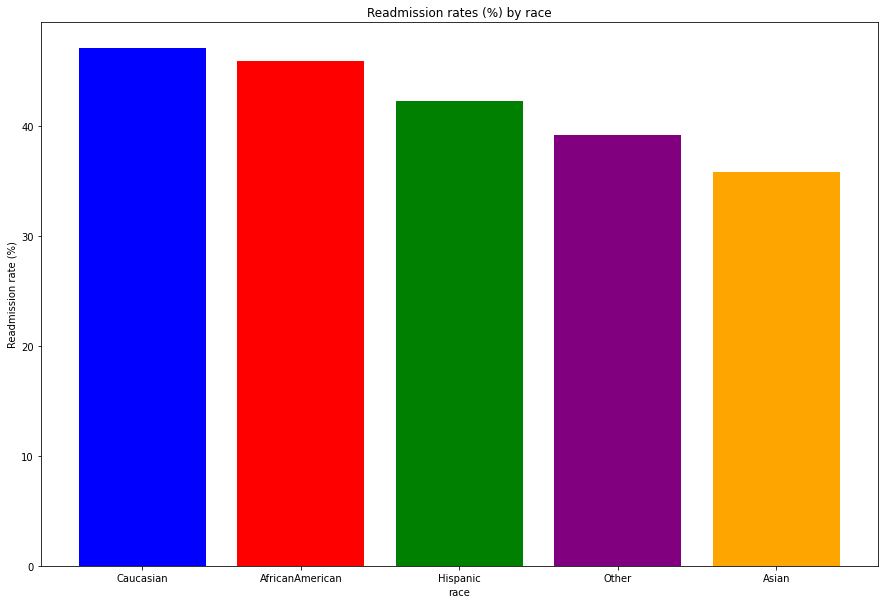

In [26]:

total = [j for j in df_race["count"]]
readmit = [j for j in df_race_readmit["count"]]
readmit_percent=[]
readmit_percent=[(readmit[i]/total[i])*100 for i in range(len(total))]
x=[j for j in df_race_readmit["race"]]
plt.figure(figsize=(15,10))
plt.bar(x,readmit_percent,color=["blue","red","green","purple","orange"])
plt.title("Readmission rates (%) by race")
plt.xlabel('race')
plt.ylabel('Readmission rate (%)')


It appears that patients of Caucasian and African American descent have the highest readmission rates, while patients of asian deschent have the lowest readmission rate. However, there is a very small range between the readmission rates.

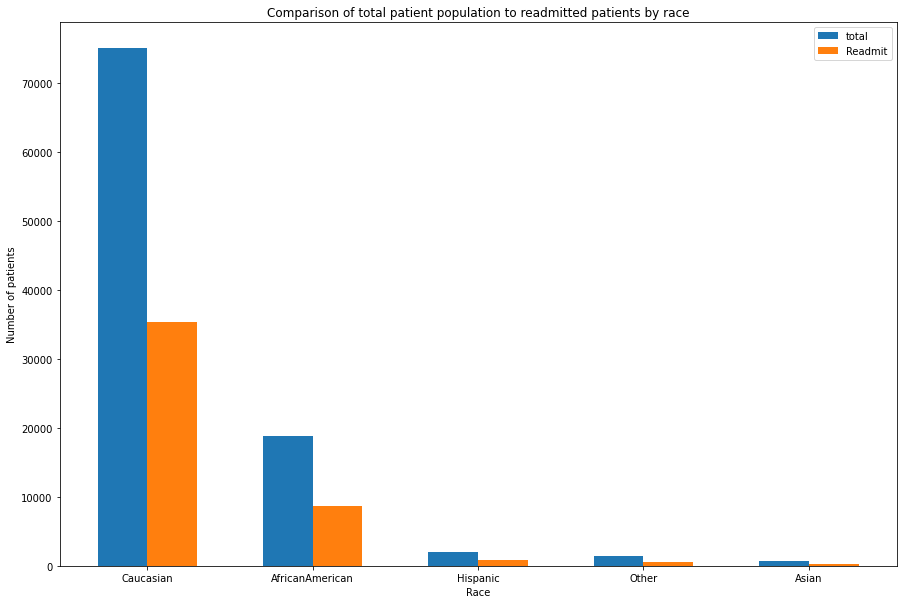

In [27]:
labels = [j for j in df_race_readmit["race"]]
total = [j for j in df_race["count"]]
readmit = [j for j in df_race_readmit["count"]]

x = np.arange(len(labels))  
width = 0.3  
plt.figure(figsize=(15,10))
# fig, ax = plt.subplots()
#plt.bar(x - width/2, total, height=10,width=0.3, label='Total')
plt.bar(x-width/2,total,width=0.3,label="total")
plt.bar(x + width/2,readmit,width=0.3,label='Readmit')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Number of patients')
plt.xlabel("Race")
plt.title('Comparison of total patient population to readmitted patients by race')
plt.xticks(x,labels)
plt.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

#fig.tight_layout()

plt.show()

We observe roughly the same racial distribution in the total patient population and the population of readmitted patients. There are no surprising trends here.

##Correlation Analysis
Some of the columns within our dataset are likely closely linked to each other. For example, time spent in hospital is probably correlated with the number of medications the patient is on. To remove multicollinearity, which weakens the learning power of our models, we will remove highly correlated features. We can determine highly correlated features using a correlation heatmap.

In [28]:
#Include only numerical valued columns
numerics_df=diabetes_df.select_dtypes(include="number")
numerics_df

,id,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
1,2,149190,55629189,1,1,7,3,59,0,18,0,0,0,9
2,3,64410,86047875,1,1,7,2,11,5,13,2,0,1,6
3,4,500364,82442376,1,1,7,2,44,1,16,0,0,0,7
4,5,16680,42519267,1,1,7,1,51,0,8,0,0,0,5
5,6,35754,82637451,2,1,2,3,31,6,16,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,101762,443847548,100162476,1,3,7,3,51,0,16,0,0,0,9
101762,101763,443847782,74694222,1,4,5,5,33,3,18,0,0,1,9
101763,101764,443854148,41088789,1,1,7,1,53,0,9,1,0,0,13
101764,101765,443857166,31693671,2,3,7,10,45,2,21,0,0,1,9


We will start with visualizing the correlation matrix for all numerical variables.

Text(0.5, 1.0, 'Correlation Heatmap')

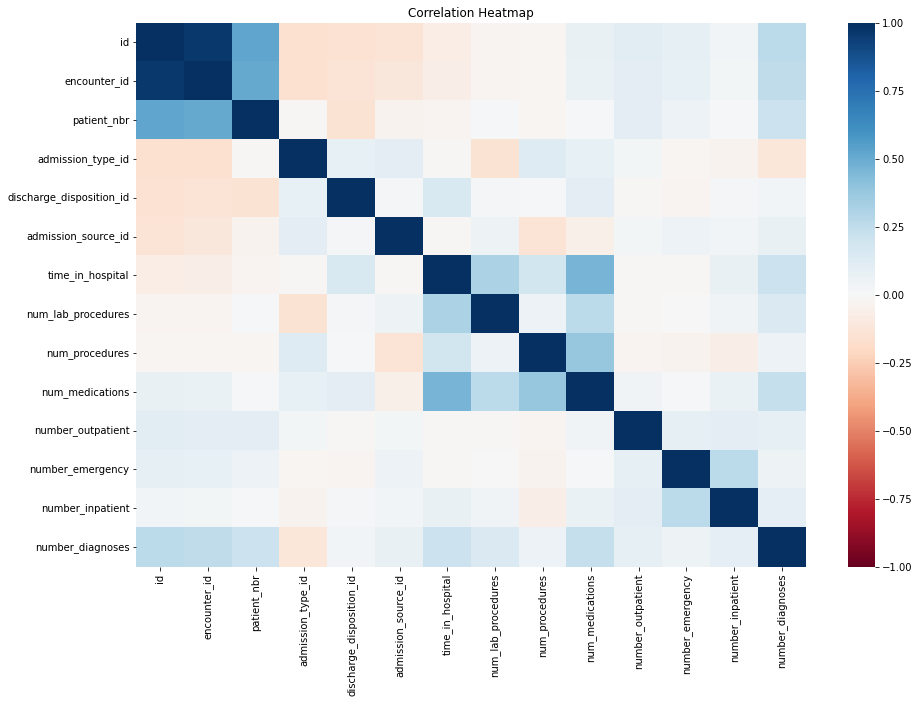

In [29]:
plt.figure(figsize=(15,10))
corr_matrix=numerics_df.corr()
heatmap=sns.heatmap(corr_matrix,vmin=-1,vmax=1,cmap="RdBu")
heatmap.set_title("Correlation Heatmap")  

From this heatmap, we can determine highly correlated features. Most notably, time spent in the hospital is correlated with number of lab procedures and number of medications.

Intuitively, it seems that the discharge destination of a patient after their first hospitalization may affect their likelihood of readmission. We can explore this using a correlation heatmap between the one-hot-encoded discharge_disposition variables and the one-hot_encoded readmission variables.

Text(0.5, 1.0, 'Correlation Heatmap for discharge disposition id and readmittance')

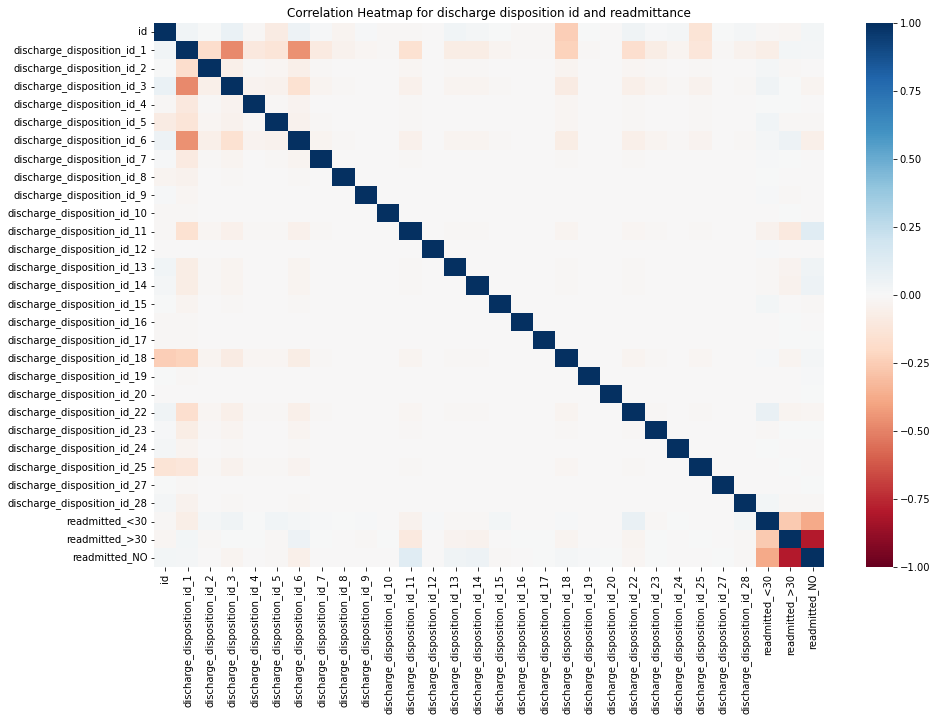

In [30]:
df_discharge=diabetes_df[["id","discharge_disposition_id","readmitted"]]
df_discharge=pd.get_dummies(df_discharge,columns=["discharge_disposition_id","readmitted"])
df_discharge
plt.figure(figsize=(15,10))
corr_matrix=df_discharge.corr()
heatmap=sns.heatmap(corr_matrix,vmin=-1,vmax=1,cmap="RdBu")
heatmap.set_title("Correlation Heatmap for discharge disposition id and readmittance")  

The correlation heatmap reveals that there is little to not correlation between discharge destination and readmission.

We will also incorporate one-hot-encoded medications into our correlation matrix.

In [31]:
#One hot encode medications
df=pd.get_dummies(diabetes_df,columns=["race","gender","insulin","glyburide.metformin","glipizide.metformin","glimepiride.pioglitazone","metformin.rosiglitazone","metformin.pioglitazone","change","diabetesMed","readmitted"])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98052 entries, 1 to 101765
Data columns (total 66 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   id                               98052 non-null  int64 
 1   encounter_id                     98052 non-null  int64 
 2   patient_nbr                      98052 non-null  int64 
 3   age                              98052 non-null  object
 4   admission_type_id                98052 non-null  int64 
 5   discharge_disposition_id         98052 non-null  int64 
 6   admission_source_id              98052 non-null  int64 
 7   time_in_hospital                 98052 non-null  int64 
 8   num_lab_procedures               98052 non-null  int64 
 9   num_procedures                   98052 non-null  int64 
 10  num_medications                  98052 non-null  int64 
 11  number_outpatient                98052 non-null  int64 
 12  number_emergency               

Text(0.5, 1.0, 'Correlation Heatmap')

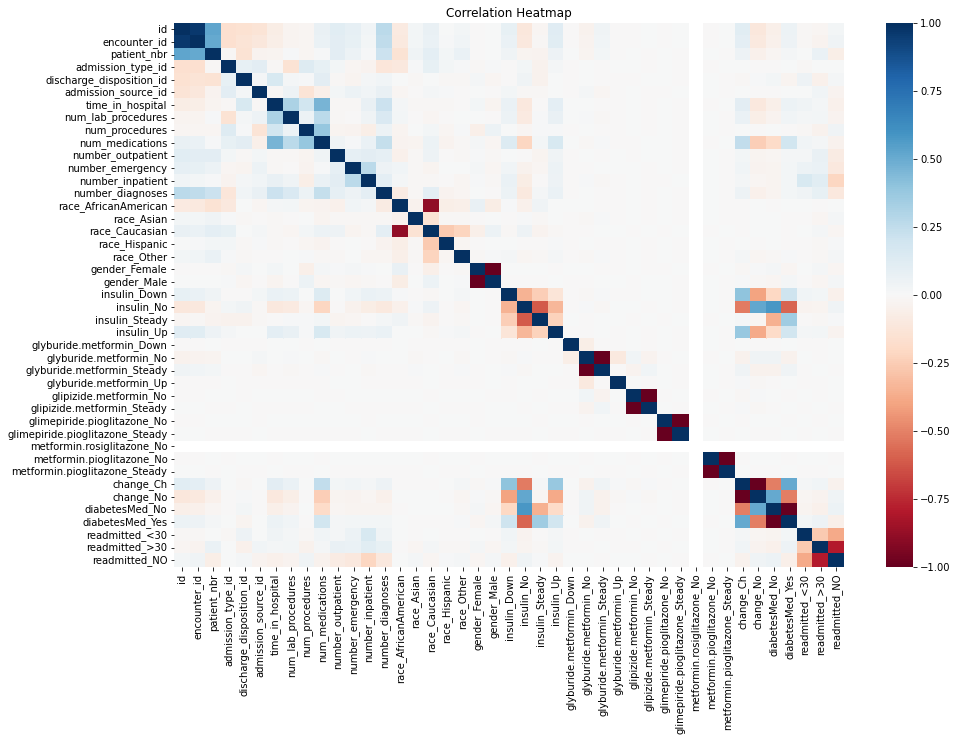

In [33]:
df_corr=df
plt.figure(figsize=(15,10))
df_corr_matrix=df_corr.corr()
heatmap=sns.heatmap(df_corr_matrix,vmin=-1,vmax=1,cmap="RdBu")
heatmap.set_title("Correlation Heatmap")

There are no notable correlations between medications and readmission rate.

We can further explore demographic predictors of readmission with correlation heatmaps. We will start with race.

Text(0.5, 1.0, 'Correlation Heatmap')

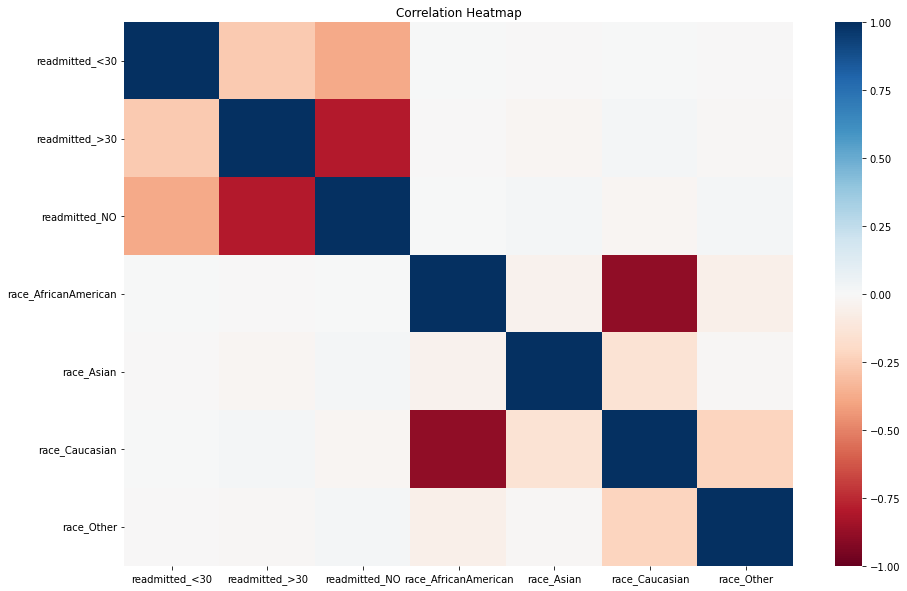

In [34]:
race_corr_df=df[["readmitted_<30","readmitted_>30","readmitted_NO","race_AfricanAmerican","race_Asian","race_Caucasian","race_Other"]]
plt.figure(figsize=(15,10))
race_corr_matrix=race_corr_df.corr()
heatmap=sns.heatmap(race_corr_matrix,vmin=-1,vmax=1,cmap="RdBu")
heatmap.set_title("Correlation Heatmap")  

No notable correlations between race and readmission.

We can do a similar analysis between gender and readmission.

Text(0.5, 1.0, 'Correlation Heatmap')

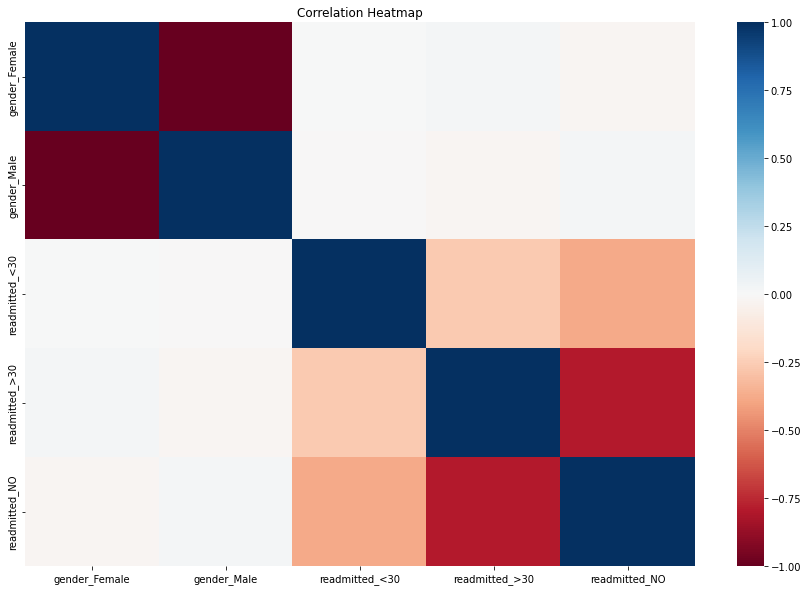

In [35]:
gender_corr_df=df[["gender_Female","gender_Male","readmitted_<30","readmitted_>30","readmitted_NO"]]
plt.figure(figsize=(15,10))
gender_corr_matrix=gender_corr_df.corr()
heatmap=sns.heatmap(gender_corr_matrix,vmin=-1,vmax=1,cmap="RdBu")
heatmap.set_title("Correlation Heatmap")

No notable correlations between gender and readmission.

#Modeling

Initially, we wanted to train a simple classifier model in which we observe two possible outputs (readmitted or not readmitted). To do this, we grouped "readmitted after 30 days" and "readmitted within 30 days" together. We also converted categorical variables to scaled quantitative variables where appropriate (age, A1C result, max serum glucose, and changes in medication).

In [36]:
#Feature manipulation
data_df = pd.get_dummies(diabetes_df, columns= ["race", "gender", 'change', 'diabetesMed',"discharge_disposition_id"])
data_df['age'] = data_df['age'].map({
    '[10-20)': 15, 
    '[20-30)': 25, 
    '[30-40)': 35, 
    '[40-50)': 45, 
    '[50-60)': 55, 
    '[60-70)': 65,
    '[70-80)': 75,
    '[80-90)': 85,
    '[90-100)': 95,
    '[0-10)': 5
})

data_df['A1Cresult'] = data_df['A1Cresult'].map({
    'None': 0,
    'Norm': 1,
    '>7': 2,
    '>8': 3
})

data_df['max_glu_serum'] = data_df['max_glu_serum'].map({
    'None': 0,
    'Norm': 1,
    '>200': 2,
    '>300': 3
})

for i in ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide.metformin', 'glipizide.metformin',
       'glimepiride.pioglitazone', 'metformin.rosiglitazone',
       'metformin.pioglitazone']:
  data_df[i] = data_df[i].map({
      'No': 0, 
      'Down': 1,
      'Steady': 2, 
      'Up': 3
  })

data_df['diag_1'] = pd.to_numeric(data_df['diag_1'],errors='coerce')
data_df['diag_2'] = pd.to_numeric(data_df['diag_1'],errors='coerce')
data_df['diag_3'] = pd.to_numeric(data_df['diag_1'],errors='coerce')
data_df = data_df.dropna()

In [37]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96451 entries, 1 to 101765
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           96451 non-null  int64  
 1   encounter_id                 96451 non-null  int64  
 2   patient_nbr                  96451 non-null  int64  
 3   age                          96451 non-null  int64  
 4   admission_type_id            96451 non-null  int64  
 5   admission_source_id          96451 non-null  int64  
 6   time_in_hospital             96451 non-null  int64  
 7   num_lab_procedures           96451 non-null  int64  
 8   num_procedures               96451 non-null  int64  
 9   num_medications              96451 non-null  int64  
 10  number_outpatient            96451 non-null  int64  
 11  number_emergency             96451 non-null  int64  
 12  number_inpatient             96451 non-null  int64  
 13  diag_1         

Now, to clean up a bit more, we removed irrelevant features and separated the features and labels from one another. 

In [38]:
#Separating features and labels from original data set and removing irrelevant features
data_df = data_df.drop(['id', 'encounter_id', 'patient_nbr'], axis = 1)
features = data_df.drop(['readmitted'], axis = 1)
labels = data_df[['readmitted']]
labels['readmitted'] = labels['readmitted'].map({'>30': 1, '<30': 2, 'NO': 0})

<ipython-input-38-aafb0a5733b9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels['readmitted'] = labels['readmitted'].map({'>30': 1, '<30': 2, 'NO': 0})


##Logisitic Regression

The first model that we ran was a simple logisitic regression in which we split the data into train and test subsets (20% of data). We then implemented and trained the logisitic regression model (without regularization).

In [39]:
#Categorizing outputs as two levels (readmitted or not readmitted)
labels_log = labels.copy()
labels_log['readmitted'] = labels_log['readmitted'].map({1: 1, 2: 1, 0: 0})

In [40]:
#Test train split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, labels_log, test_size = 0.2, random_state = 42)

In [41]:
#Basic Logistic Regression
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression(penalty = 'none', solver = 'saga', max_iter = 3000).fit(x_train, y_train)
pred = logR.predict(x_test)

#Metrics 
trainScore = logR.score(x_train, y_train)
testScore = logR.score(x_test, y_test)
print("Train Score: " + str(round(trainScore, 3)))
print("Test Score: " + str(round(testScore, 3)))


from sklearn import metrics
cm = metrics.confusion_matrix(y_test, pred)
cm = cm.astype('float') / cm.sum(axis=1).sum()
print(cm)


#Old
# Train Score: 0.617
# Test Score: 0.617
# [[0.42838629 0.10450469]
# [0.27852366 0.18858535]]

#New by including one hot encoded disposition IDs.
# Train Score: 0.623
# Test Score: 0.622
# [[0.42848997 0.10440102]
#  [0.27328806 0.19382095]]



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Score: 0.623
Test Score: 0.622
[[0.42848997 0.10440102]
 [0.27328806 0.19382095]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


The result of this analysis was a train score of 62.3% and a test score or 62%. It appears as though the model was well fit, but potentially could be improved. False positive and false negative rates, respectively, were 10% and 27% suggesting that we incorrectly predicted that a patient would not be readmitted when, in fact, they did get readmitted. Admittedly, this is something we need to reduce in order to account for the natural cost function associated with misdiagnosis. 

We attempted to incorporate an L2 penalty in order to see if certain elements, like demographics, were significant predictors while the medication changes were not. 

In [42]:
#L2 Penalty
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression(max_iter = 3000, solver = 'saga').fit(x_train, y_train)
pred = logR.predict(x_test)

#Metrics 
trainScore = logR.score(x_train, y_train)
testScore = logR.score(x_test, y_test)
print("Train Score: " + str(round(trainScore, 3)))
print("Test Score: " + str(round(testScore, 3)))


from sklearn import metrics
cm = metrics.confusion_matrix(y_test, pred)
cm = cm.astype('float') / cm.sum(axis=1).sum()
print(cm)


#Old
# Train Score: 0.617
# Test Score: 0.617
# [[0.42838629 0.10450469]
# [0.27852366 0.18858535]]

#New by including one hot encoded disposition IDs.
# Train Score: 0.622
# Test Score: 0.622
# [[0.42854181 0.10434918]
# [0.27328806 0.19382095]]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Score: 0.622
Test Score: 0.622
[[0.42854181 0.10434918]
 [0.27328806 0.19382095]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


However, there was no significant change to the results here with respect to accuracy or the outcomes table. 

<BarContainer object of 76 artists>

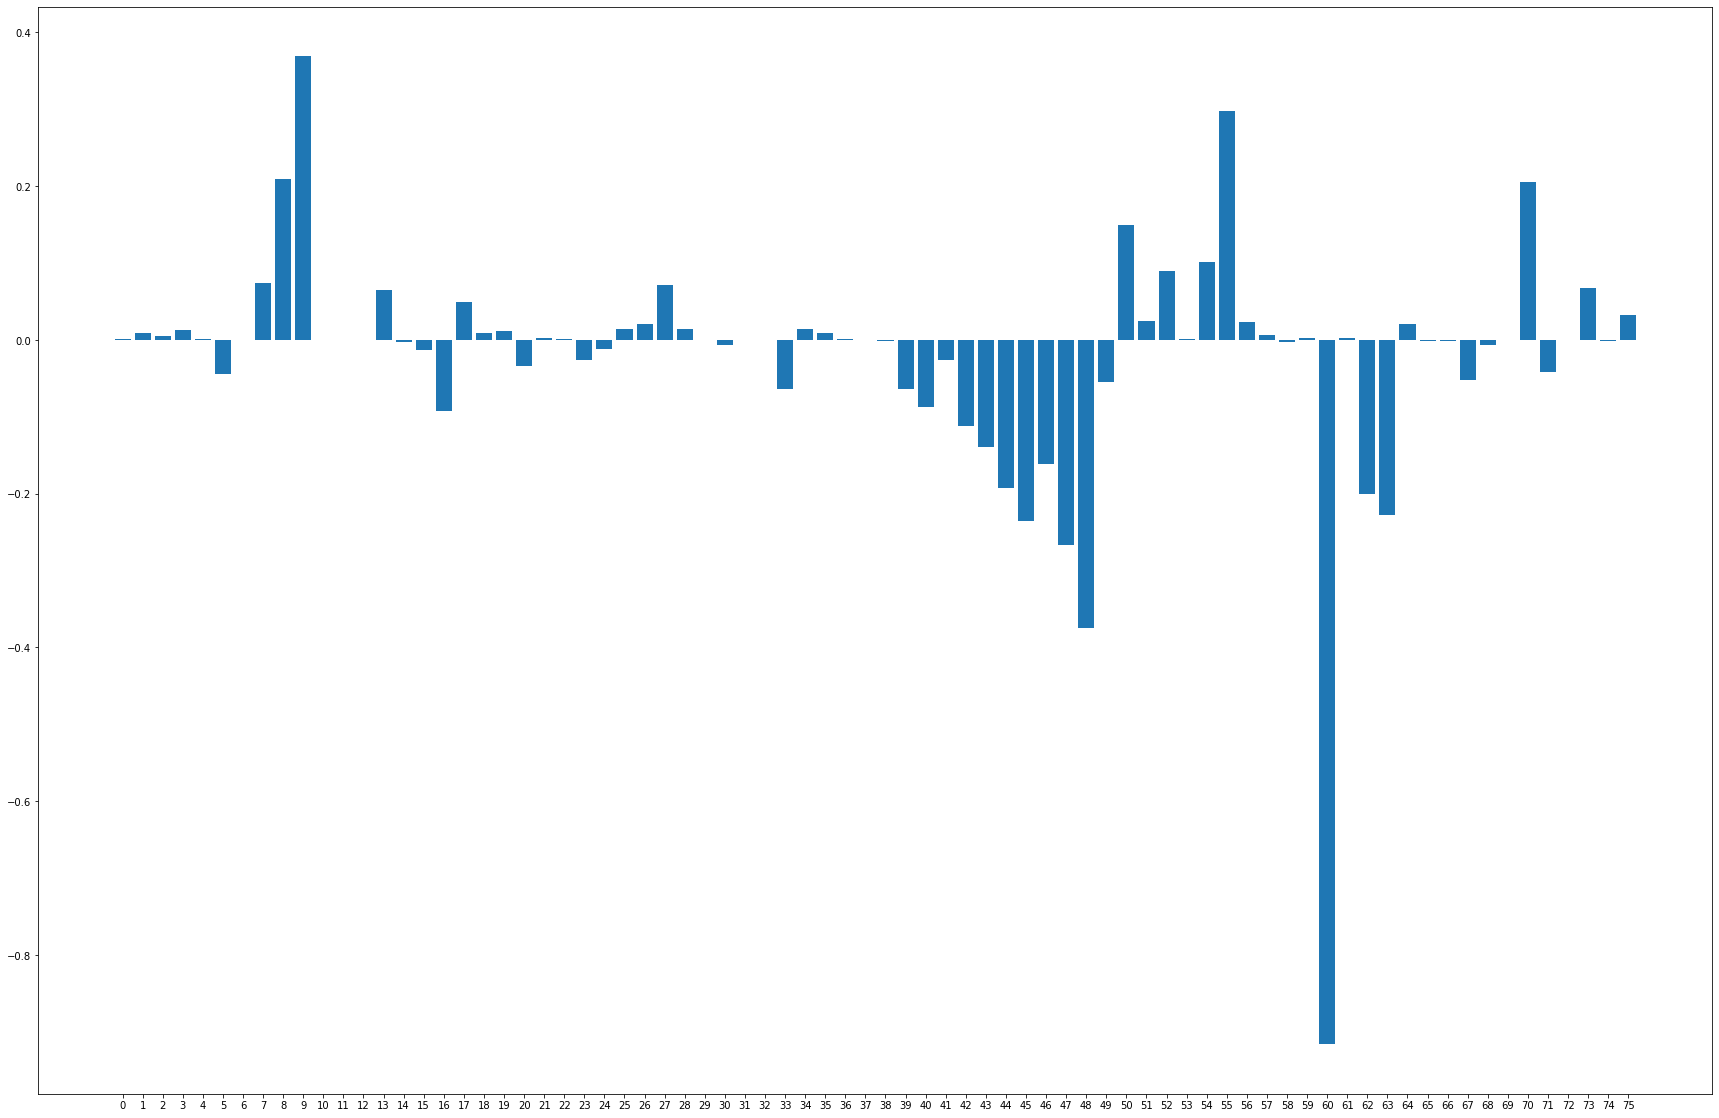

In [43]:
importance=logR.coef_
importance
plt.figure(figsize=(30,20))
y=[i for i in importance[0]]
x=[i for i in range(len(importance[0]))]
plt.xticks(x)
plt.bar(x,y)

This feature coefficient graphic demonstrates that certain features are either scaled very differently than the others or are significant predictors of outcomes. 

In [44]:
# feat=features.drop(features.columns[[i for i in range(len(importance[0])) if (importance[0][i]<0.1 and importance[0][i]>0) or (importance[0][i]>-0.1 and importance[0][i]<0)]],axis=1)
# feat.info()

In [45]:
#L1 Penalty
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression(penalty = 'l1', solver = 'saga', max_iter = 3000).fit(x_train, y_train)
pred = logR.predict(x_test)

#Metrics 
trainScore = logR.score(x_train, y_train)
testScore = logR.score(x_test, y_test)
print("Train Score: " + str(round(trainScore, 3)))
print("Test Score: " + str(round(testScore, 3)))


from sklearn import metrics
cm = metrics.confusion_matrix(y_test, pred)
cm = cm.astype('float') / cm.sum(axis=1).sum()
print(cm)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Score: 0.623
Test Score: 0.622
[[0.42848997 0.10440102]
 [0.27328806 0.19382095]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


When we incorporate an L1 penalty to account for multicollinearity, we once again saw no change.

ROC AUC: 0.61


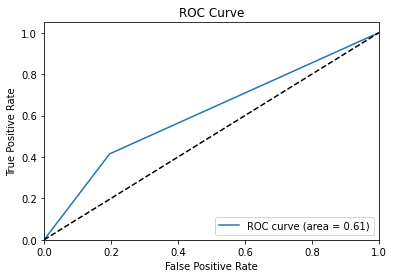

In [46]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, cohen_kappa_score
fpr, tpr, _ = roc_curve(y_test, pred, pos_label = 1)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

When plotting the ROC of the Logisitic Regression, there was a clear benefit to using the model over a naive guessing model. However, performance is clearly not ideal.

## PCA

To address potential scale variations that we mentioned above, we decided to apply a Standard Scaler and PCA before running the logisitic regression to see if we could utilize abstract features (linear combinations of real features) to predict readmittance outcomes. 

Text(0.5, 1.0, 'Cumulative Explained Variance vs. Number of Component')

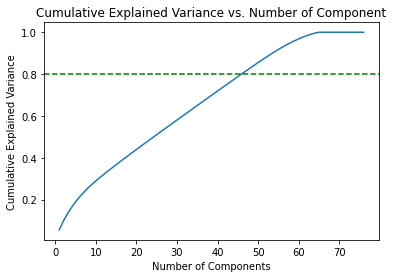

In [47]:
#Initial PCA to find number of principle components
#Import libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(x_train)
pca = PCA()
x_train_2 = pca.fit_transform(X) 
explained_variance_ratios = pca.explained_variance_ratio_
cum_evr = np.cumsum(explained_variance_ratios)
# find optimal num components to use (n) by plotting explained variance ratio 
num_comp = np.arange(1,77)
plt.plot(num_comp, cum_evr)
plt.axhline(y = 0.8, color = 'g', linestyle = '--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Component')

The cumulative explained variance curve demonstrates that about 45 principal components will sufficiently explain at least 80% of the variance in the data.

In [48]:
#PCA using n=28 components
pca = PCA(n_components = 45)
x_train_2 = ss.fit_transform(x_train)
x_train_2 = pca.fit_transform(x_train_2)
x_test_2 = ss.transform(x_test)
x_test_pca = pca.transform(x_test_2)
log_reg_pca= LogisticRegression()
log_reg_pca.fit(x_train_2, y_train)
y_pred_pca = log_reg_pca.predict(x_test_pca)
#metrics
test_accuracy = log_reg_pca.score(x_test_pca, y_test)
print("Test accuracy: " + str(round(test_accuracy,4)))

#Old
# Test accuracy: 0.6057

#New by including one hot encoded disposition IDs.
# Test accuracy: 0.6175

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test accuracy: 0.6184


However, we observed a reduction in the train and test accuracy of our model when using PCA-transformed data. This is to be expected as we elimintated principal components that composed at least 20% of the variance in the original readmittance data.

##Decision Tree

In the context of our use case, knowing/predicting if a patient will have an acute readmittance (within 30 days) can help significantly in triaging care. For example, if we know with high probability that a patient will be readmitted, we can monitor their signs and symptoms more closely to ensure prompt care. Furthermore, one of the pay-for-performance metrics that hospitals are rated on, by the government, is 30-day readmittance rate. Therefore, being able to predict readmittance timeframe and likelihood for a patient, and patient population, can yield insight on expected expenditures/losses due to readmittance. Therefore, we expanded our model to be a Decision Tree with multiclass classification (3 classes: no readmittance, readmittance after 30 days, and readmittance within 30 days) which are graded and stored as floats on a scale (with 2 being no readmittance, 1 being readmittance after 30 days, and 0 being no readmittance.

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
tree_param = {'criterion':['gini','entropy'],'max_depth':[4, 5, 6, 7, 8, 9, 10]}
clf = DecisionTreeClassifier(random_state = 42)

dt_cv = GridSearchCV(clf,
                    tree_param,
                    cv = 5,
                    n_jobs = -1)
dt_cv.fit(x_train, y_train)
print(f"Best parameters:\n{dt_cv.best_params_}")
print(f"Best Score: {dt_cv.best_score_}")

Best parameters:
{'criterion': 'gini', 'max_depth': 9}
Best Score: 0.628784344219803


The best parameters from a simple GridSearch on the Decision Tree Classifier were to use the Gini index and evaluate the entropy of the system. Although we saw a marginal improvement in the train data score, we cannot make conclusions about the general qualtiy of the model for test data.

##Random Forest

In order to boost this seaamingly low training score, we decide to emsemble decision trees like a random forest and conduct hyperparamter tunig to generate an ideal model.

<ipython-input-50-9583be0c032c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfMod = RandomForestClassifier(max_depth = 15, n_jobs = -1).fit(x_train, y_train)


Train Score: 0.675
Test Score: 0.58
[[8910 1369    1]
 [4571 2264    3]
 [1354  811    8]]


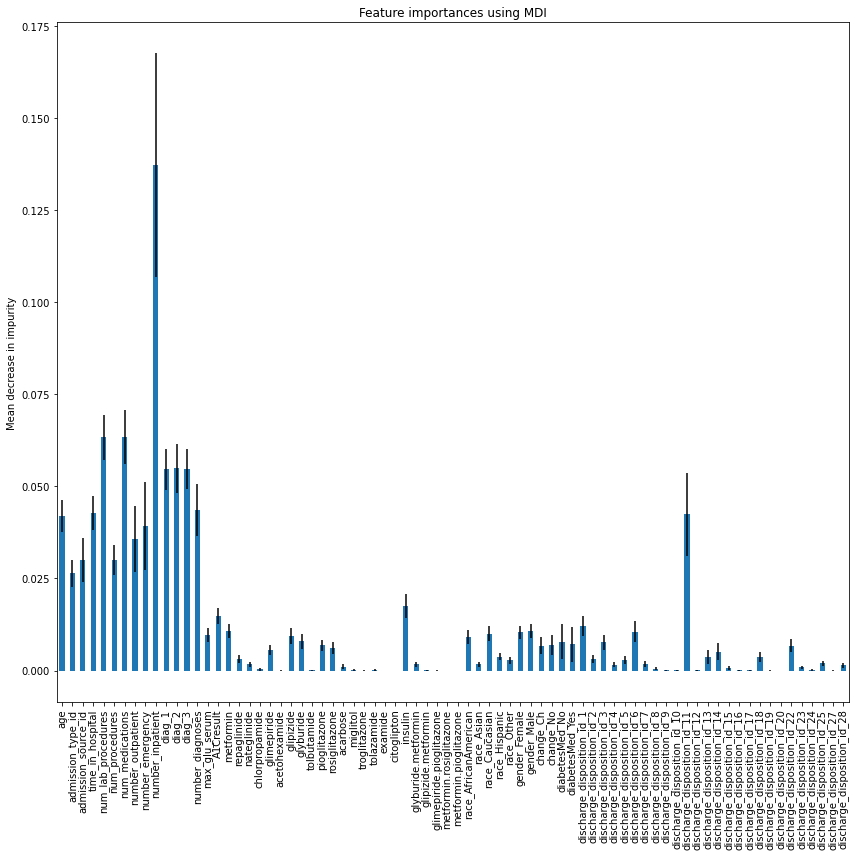

In [50]:
from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 42)
rfMod = RandomForestClassifier(max_depth = 15, n_jobs = -1).fit(x_train, y_train)
pred = rfMod.predict(x_test)

#Metrics 
trainScore = rfMod.score(x_train, y_train)
testScore = rfMod.score(x_test, y_test)
print("Train Score: " + str(round(trainScore, 3)))
print("Test Score: " + str(round(testScore, 3)))


from sklearn import metrics
cm = metrics.confusion_matrix(y_test, pred)
print(cm)

#Feature importance - Rank features 
import time
import numpy as np

start_time = time.time()
importances = rfMod.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfMod.estimators_], axis=0)
elapsed_time = time.time() - start_time
import pandas as pd

forest_importances = pd.Series(importances, list(features.columns))

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax, figsize=(12,12))
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#importances_df = pd.DataFrame()
#importances_df['feature'] = list(features.columns)
#importances_df['importance'] = forest_importances

#g = sns.catplot(data = importances_df, kind = 'bar', x = 'feature', y = 'importance', height = 6, dodge = False)
#g.set_xticklabels(rotation=90)
#try other dataset, do comparisons

Predictor importance dmontrated that the most important determinants of readmittance were related to type of diagnosis and procedures conducted as well as a particular hospital discharge. All other factors are near zero in weight. Note: Although we found some correlation between num_procedures and num_medications in our EDA, we chose to leave the features in our model because 1) the correlation is not strong and 2) we saw no improvement with regularization.

In [51]:
#Hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV

#number of trees in forest
n_estimators = range(200, 1000, 5)


#maximum depth of tree
max_depth = range(9,12,3)

random_grid = {'n_estimators': n_estimators, 
               'max_depth': max_depth, 
               }

#scoring
#from sklearn.metrics import make_scorer, roc_auc_score
#auc_scoring = make_scorer(roc_auc_score)
rfMod = RandomForestClassifier(n_jobs = -1)

rf_random = RandomizedSearchCV(estimator = rfMod, param_distributions = random_grid,
                               n_iter = 10, cv = 3, scoring = 'f1_macro', verbose = 5, random_state = 42)

rf_random.fit(x_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END .....max_depth=9, n_estimators=725;, score=0.355 total time=  17.9s


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END .....max_depth=9, n_estimators=725;, score=0.353 total time=  19.1s


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END .....max_depth=9, n_estimators=725;, score=0.352 total time=  17.6s


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END .....max_depth=9, n_estimators=740;, score=0.355 total time=  18.4s


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END .....max_depth=9, n_estimators=740;, score=0.353 total time=  18.2s


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END .....max_depth=9, n_estimators=740;, score=0.351 total time=  18.2s


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END .....max_depth=9, n_estimators=905;, score=0.355 total time=  22.0s


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END .....max_depth=9, n_estimators=905;, score=0.353 total time=  22.0s


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END .....max_depth=9, n_estimators=905;, score=0.351 total time=  22.0s


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END .....max_depth=9, n_estimators=475;, score=0.355 total time=  11.8s


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END .....max_depth=9, n_estimators=475;, score=0.356 total time=  11.8s


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END .....max_depth=9, n_estimators=475;, score=0.351 total time=  13.1s


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END .....max_depth=9, n_estimators=670;, score=0.356 total time=  16.6s


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END .....max_depth=9, n_estimators=670;, score=0.355 total time=  16.4s


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END .....max_depth=9, n_estimators=670;, score=0.351 total time=  16.6s


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END .....max_depth=9, n_estimators=345;, score=0.355 total time=   8.5s


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END .....max_depth=9, n_estimators=345;, score=0.354 total time=   8.6s


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END .....max_depth=9, n_estimators=345;, score=0.348 total time=   8.7s


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END .....max_depth=9, n_estimators=705;, score=0.356 total time=  17.3s


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END .....max_depth=9, n_estimators=705;, score=0.353 total time=  17.5s


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END .....max_depth=9, n_estimators=705;, score=0.350 total time=  17.5s


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/3] END .....max_depth=9, n_estimators=455;, score=0.358 total time=  11.1s


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/3] END .....max_depth=9, n_estimators=455;, score=0.354 total time=  10.9s


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/3] END .....max_depth=9, n_estimators=455;, score=0.352 total time=  11.3s


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


KeyboardInterrupt: ignored

Unfortunately, depite the hyperparameter optimization, we were unable to produce a more accuracy model with random forests as can be seen below in the optimial random forest training accuracy. Note that this model is clearly flawed given the lack of predictions in the final column.

In [52]:
#New model with tuned hyperparameters
rfMod_optim = RandomForestClassifier(max_depth = 9, n_estimators = 725, n_jobs = -1).fit(x_train, y_train)
pred = rfMod_optim.predict(x_test)

#Metrics 
trainScore = rfMod_optim.score(x_train, y_train)
testScore = rfMod_optim.score(x_test, y_test)
print("Train Score: " + str(round(trainScore, 3)))
print("Test Score: " + str(round(testScore, 3)))


from sklearn import metrics
cm = metrics.confusion_matrix(y_test, pred)
print(cm)


<ipython-input-52-2f6b19c9553b>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfMod_optim = RandomForestClassifier(max_depth = 9, n_estimators = 725, n_jobs = -1).fit(x_train, y_train)


Train Score: 0.59
Test Score: 0.574
[[9333  947    0]
 [5089 1749    0]
 [1512  661    0]]


Ultimately, we were able to generate strong models (~60% testing accuracy) that can predict the likelihood of readmittance and the likelihood of readmittance within 30 days of discharge. The top 5 most important features in the random forest model were number of prior inpatient visits, number of medications, number of lab procedures, and diagnosis type (1,2). 